# iris

In [1]:
# 독립변수 4
# 종속변수 1

#    원-핫 인코딩
# 0      =>      100
# 1      =>      010
# 2      =>      001

In [2]:
import seaborn as sns

#붓꽃 데이터셋 로딩
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#품종 확인
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X=iris.iloc[:, :4].values # 독립변수
y=iris.iloc[:,4].values  #종속변수

print(y[:5])

encoder=LabelEncoder() #문자열에 label을 붙임

y1=encoder.fit_transform(y)
print(y1[:5])

y2=pd.get_dummies(y1).values #종속변수에 대한 원핫인코딩 처리
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


In [5]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y,random_state=10)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#모델 생성
model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
#               output(64)    input(4)
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

#       input   hidden-1    hidden-2    output
#       4       64          64          3

sgd = SGD(learning_rate=0.01)   # rate 값이 작으면 정밀하게 검사함 -> 속도가 늦어짐 / 크게하면 최저점을 지날 수 있음
#       확률적 경사 하강법
#       (경사 하강법 : 모든 샘플을 검사함 -> 확률적 경사 하강법 : 한 사이클에 랜덤으로 샘플을 뽑아 기울기를 검사함)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#                   다분류                                                정확도

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4675 (18.26 KB)
Trainable params: 4675 (18.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


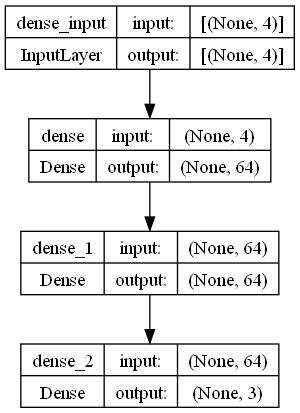

In [8]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [ ]:
# train       test
# 8           2
# 7           3

# validation은 학습에 직접 참여하지 않음 조기학습에 사용
#train     validation      test


In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

es = EarlyStopping(monitor='val_loss', patience=10)
#       조기학습종료   기준   validation_loss를 검사  patience(종료 횟수)

# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("iris_best.h5", save_best_only=True)

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5) #기존 학습률*factor (배수) => 학습률이 줄어 더 자세히 하게 됨

# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("mylog.csv")  

hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/100
3/3 [==============================] - 1s 102ms/step - loss: 1.4257 - accuracy: 0.2917 - val_loss: 1.1475 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 1.1637 - accuracy: 0.2396 - val_loss: 1.1329 - val_accuracy: 0.0833 - lr: 0.0100
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 1.0905 - accuracy: 0.2917 - val_loss: 1.0968 - val_accuracy: 0.2083 - lr: 0.0100
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 1.0547 - accuracy: 0.2604 - val_loss: 1.0863 - val_accuracy: 0.1250 - lr: 0.0100
Epoch 5/100
1/3 [=========>....................] - ETA: 0s - loss: 1.0625 - accuracy: 0.2812

c:\Python3.9.13\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 21ms/step - loss: 1.0308 - accuracy: 0.3333 - val_loss: 1.0538 - val_accuracy: 0.2917 - lr: 0.0100
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 1.0110 - accuracy: 0.3229 - val_loss: 1.0216 - val_accuracy: 0.3750 - lr: 0.0100
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.9895 - accuracy: 0.3854 - val_loss: 0.9953 - val_accuracy: 0.6250 - lr: 0.0100
Epoch 8/100
3/3 [==============================] - 0s 21ms/step - loss: 0.9709 - accuracy: 0.4167 - val_loss: 0.9518 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 9/100
3/3 [==============================] - 0s 21ms/step - loss: 0.9470 - accuracy: 0.6458 - val_loss: 0.9370 - val_accuracy: 0.9167 - lr: 0.0100
Epoch 10/100
3/3 [==============================] - 0s 21ms/step - loss: 0.9289 - accuracy: 0.6250 - val_loss: 0.9137 - val_accuracy: 0.9167 - lr: 0.0100
Epoch 11/100
3/3 [==============================] - 0s 21ms/step - loss: 0.9223 - accuracy: 0

In [10]:
from keras.models import load_model

model=load_model('iris_best.h5')  

model.evaluate(X_test, y_test, verbose=0)
#               loss      accuracy

[0.37092962861061096, 0.9333333373069763]

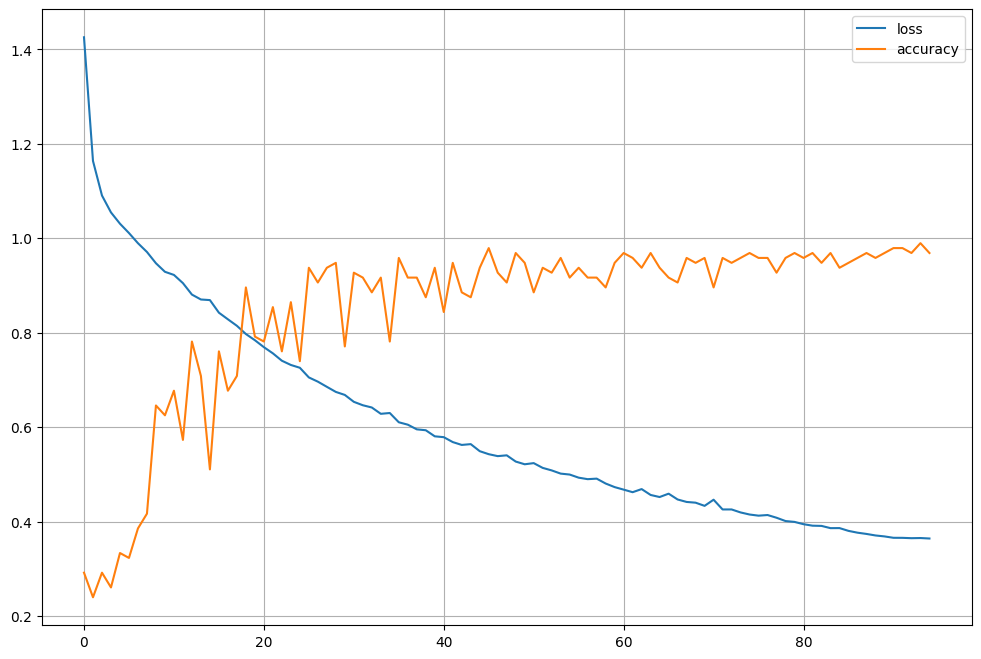

In [11]:
import matplotlib.pyplot as plt

#그래프 출력
plt.figure(figsize=(12,8))

plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도

plt.legend(['loss','accuracy'])

plt.grid()

plt.show()

In [12]:
#모델 평가
loss, accuracy = model.evaluate(X_test, y_test,  verbose=0)

print("정확도 = {:.2f}".format(accuracy))

정확도 = 0.93


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
print(pred[:10])

y_test_class = np.argmax(y_test,axis=1)
#                  최댓값의 max
pred_class = np.argmax(pred,axis=1)

print(y_test_class[:10])
print(pred_class[:10])

print(confusion_matrix(y_test_class,pred_class))
# 0     1      2

1/1 [==============================] - 0s 17ms/step
[[0.02658292 0.49514407 0.47827306]
 [0.89759415 0.08839136 0.01401457]
 [0.02269584 0.4485524  0.5287518 ]
 [0.0157319  0.41976812 0.56450003]
 [0.09053828 0.5803241  0.32913762]
 [0.01031966 0.34767473 0.64200556]
 [0.88028556 0.10242665 0.01728788]
 [0.00805382 0.29633382 0.6956124 ]
 [0.00660766 0.30017272 0.69321966]
 [0.97041345 0.02711822 0.0024683 ]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 2 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


In [14]:
model.save('c:/workspace3/model/iris/iris.h5')

c:\Python3.9.13\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
